In [6]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#insert data using pandas library
data=pd.read_csv("C:/Users/DELL/Desktop/BreadBasker_DMS/BreadBasket_DMS.csv")

In [3]:
#first 10 rows of the dataset
data.head(10)

,Date,Time,Transaction,Item
0,30-10-2016,09:58:11,1,Bread
1,30-10-2016,10:05:34,2,Scandinavian
2,30-10-2016,10:05:34,2,Scandinavian
3,30-10-2016,10:07:57,3,Hot chocolate
4,30-10-2016,10:07:57,3,Jam
5,30-10-2016,10:07:57,3,Cookies
6,30-10-2016,10:08:41,4,Muffin
7,30-10-2016,10:13:03,5,Coffee
8,30-10-2016,10:13:03,5,Pastry
9,30-10-2016,10:13:03,5,Bread


In [4]:
#last 10 rows of the dataset
data.tail(10)

,Date,Time,Transaction,Item
21283,09-04-2017,14:30:09,9681,Tea
21284,09-04-2017,14:30:09,9681,Spanish Brunch
21285,09-04-2017,14:30:09,9681,Christmas common
21286,09-04-2017,14:32:58,9682,Muffin
21287,09-04-2017,14:32:58,9682,Tacos/Fajita
21288,09-04-2017,14:32:58,9682,Coffee
21289,09-04-2017,14:32:58,9682,Tea
21290,09-04-2017,14:57:06,9683,Coffee
21291,09-04-2017,14:57:06,9683,Pastry
21292,09-04-2017,15:04:24,9684,Smoothies


In [5]:
data.shape

(21293, 4)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [9]:
#since all 21293 data is already present so no data is missing in it

In [10]:
data["Item"].value_counts()

Coffee                           5471
Bread                            3325
Tea                              1435
Cake                             1025
Pastry                            856
NONE                              786
Sandwich                          771
Medialuna                         616
Hot chocolate                     590
Cookies                           540
Brownie                           379
Farm House                        374
Muffin                            370
Juice                             369
Alfajores                         369
Soup                              342
Scone                             327
Toast                             318
Scandinavian                      277
Truffles                          193
Coke                              185
Spanish Brunch                    172
Fudge                             159
Baguette                          152
Jam                               149
Tiffin                            146
Mineral wate

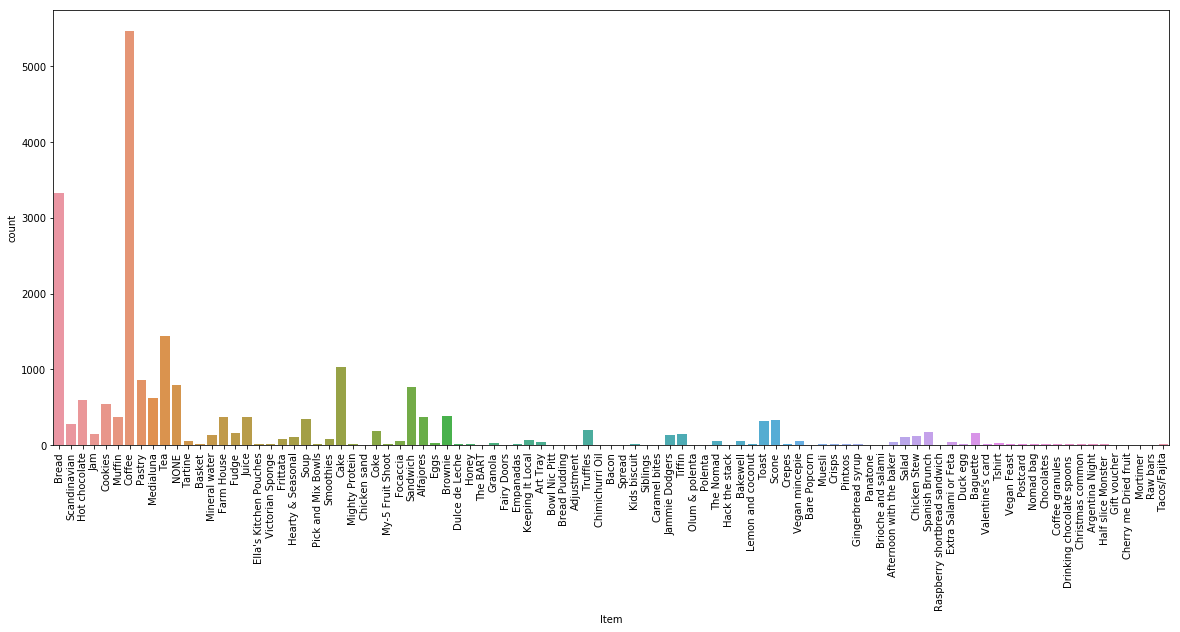

In [11]:
fig,ax=plt.subplots(figsize=(20,8))
ax=sns.countplot(data["Item"])
plt.xticks(rotation=90)
plt.show()
#the histogram states that coffee is the most selling item in the bakery followed by bread and tea

In [13]:
print(data[data['Item']=='NONE'])

             Date      Time  Transaction  Item
26     30-10-2016  10:27:21           11  NONE
38     30-10-2016  10:34:36           15  NONE
39     30-10-2016  10:34:36           15  NONE
66     30-10-2016  11:05:30           29  NONE
80     30-10-2016  11:37:10           37  NONE
85     30-10-2016  11:55:51           40  NONE
126    30-10-2016  13:02:04           59  NONE
140    30-10-2016  13:37:25           65  NONE
149    30-10-2016  13:46:48           67  NONE
167    30-10-2016  14:32:26           75  NONE
183    31-10-2016  08:47:05           82  NONE
201    31-10-2016  09:22:48           91  NONE
226    31-10-2016  10:07:40          103  NONE
235    31-10-2016  10:21:29          105  NONE
272    31-10-2016  11:42:05          123  NONE
282    31-10-2016  11:55:00          128  NONE
398    01-11-2016  09:26:03          184  NONE
413    01-11-2016  10:56:08          192  NONE
419    01-11-2016  11:06:09          195  NONE
431    01-11-2016  11:22:36          201  NONE
547    02-11-

In [ ]:
#None values are also present in our dataset so removing this dataset is better as it does not provide us any information about the transaction

In [40]:
#droping the none values transaction
data.drop(data[data['Item']=='NONE'].index, inplace=True)

In [41]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 7 columns):
Date           20507 non-null object
Time           20507 non-null object
Transaction    20507 non-null int64
Item           20507 non-null object
Year           20507 non-null object
Month          20507 non-null object
Day            20507 non-null object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None


In [18]:
#most sold products in the backery are
most_sold = data['Item'].value_counts().head(15)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Soup              342
Name: Item, dtype: int64


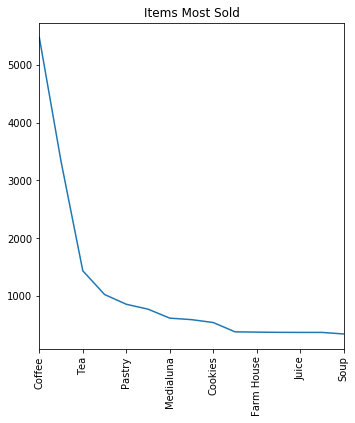

In [30]:
#line graph showing the most sold products
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
most_sold.plot(kind='line')
plt.xticks(rotation=90)
plt.title('Items Most Sold')
plt.show()



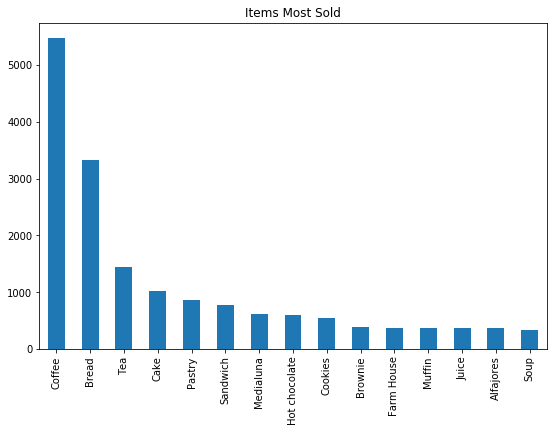

In [32]:
#bar graph showing the most sold products
plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')
plt.show()

In [36]:
# Year
data['Year'] = data['Date'].apply(lambda x: x.split("-")[0])
# Month
data['Month'] = data['Date'].apply(lambda x: x.split("-")[1])
# Day
data['Day'] = data['Date'].apply(lambda x: x.split("-")[2])

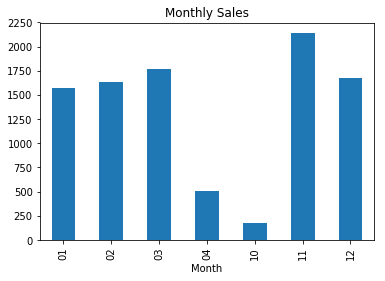

In [42]:
#plot showing which month have the most no. of transactions
data.groupby('Month')['Transaction'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()
# it tells us that novenmer month has the highest selling followed by march and december and least in the month of october
# whereas may,june,july,august,september has no sale